# Wordle Guess Information Assessment

An attempt to recreate a similar analysis to that of [3Blue1Brown](https://www.youtube.com/watch?v=v68zYyaEmEA), primarily to assess the quality of my two-word guess strategy ("horse" and "paint). Once that assessment is in place, I'd like to search for all possible two-word guesses that could be used for my strategy (two words made of the most common letters and that share no letters between them) and see how my initial picks compare. **This article** (need to find it) outlines an attempt to do a similar survey of all solid starting words, so this could be used as a starting basis.

In [1]:
import math
import numpy as np
import pandas as pd

To start, I'll utilize the Wordle word list that was available through the site's source code as of January 30, 2022. I don't think it's available anymore now that it's been ported to the New York Times, but it doesn't seem that the NYT version is using a substantially different list.

In [8]:
words_df = pd.read_csv("../data/wordle-words-20220130.csv", header = None, names = ["word", "type"])
words_df

,word,type
0,cigar,answer
1,rebut,answer
2,sissy,answer
3,humph,answer
4,awake,answer
...,...,...
12967,zuzim,guess
12968,zygal,guess
12969,zygon,guess
12970,zymes,guess


In [9]:
guesses = ["horse", "paint"]

In [12]:
word = "house"
guess = guesses[0]

In [13]:
mask_info = [(l, word[i] == l, guess[:i+1].count(l) <= word.count(l)) for i, l in enumerate(guess)]
mask_info

[('h', True, True),
 ('o', True, True),
 ('r', False, False),
 ('s', True, True),
 ('e', True, True)]

In [14]:
mask = [2 if mi[1] else 1 if mi[2] else 0 for mi in mask_info]
mask

[2, 2, 0, 2, 2]

In [15]:
def create_mask(r):
    [word, guess] = [r[0], r[1]]
    mask_info = [(l, word[i] == l, guess[:i+1].count(l) <= word.count(l)) for i, l in enumerate(guess)]
    mask = [2 if mi[1] else 1 if mi[2] else 0 for mi in mask_info]
    return "".join([str(m) for m in mask])

In [16]:
create_mask([word, guess])

'22022'

In [17]:
df = words_df[words_df["type"] == "answer"][["word"]]
for ix, guess in enumerate(guesses):
    df["guess%d" % (ix + 1)] = guess
    df["mask%d" % (ix + 1)] = df[["word", "guess%d" % (ix + 1)]].apply(create_mask, axis = 1)
# df["mask"] = df.apply(create_mask, axis = 1)

In [18]:
df

,word,guess1,mask1,guess2,mask2
0,cigar,horse,00100,paint,01100
1,rebut,horse,00101,paint,00002
2,sissy,horse,00020,paint,00100
3,humph,horse,20000,paint,10000
4,awake,horse,00002,paint,01000
...,...,...,...,...,...
2310,judge,horse,00002,paint,00000
2311,rower,horse,02101,paint,00000
2312,artsy,horse,00120,paint,01001
2313,rural,horse,00200,paint,01000


In [20]:
counts = df.groupby(np.array([["guess%d" % (ix + 1), "mask%d" % (ix + 1)] 
                              for ix in range(len(guesses))]).flatten().tolist()).count()
counts["prob"] = counts["word"] / len(words_df[words_df['type'] == "answer"])
counts["info"] = np.log2(1 / counts["prob"])
counts

word      prob       info
guess1 mask1 guess2 mask2                           
horse  00000 paint  00000    17  0.007343   7.089334
                    00010     1  0.000432  11.176796
                    00011     1  0.000432  11.176796
                    00012     1  0.000432  11.176796
                    00020     5  0.002160   8.854868
...                         ...       ...        ...
       22100 paint  01000     1  0.000432  11.176796
       22101 paint  00000     2  0.000864  10.176796
       22200 paint  00020     1  0.000432  11.176796
       22202 paint  00000     1  0.000432  11.176796
       22222 paint  00000     1  0.000432  11.176796

[1001 rows x 3 columns]

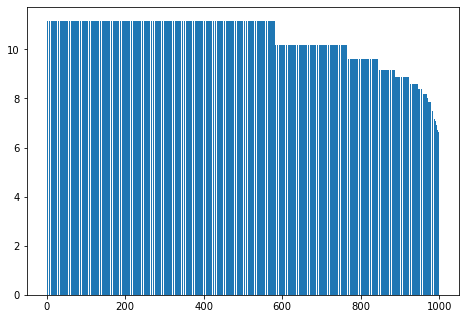

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
students = sorted(counts["info"].tolist(), reverse = True)
ax.bar(range(len(counts["info"].tolist())), students)
plt.show()